# Convolutional layer

# What is a convolution?
Let's implement a simple case with numpy to get a better understanding.

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import PIL
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
image = PIL.Image.open('building.jpg')
image = image.resize((120, 180))

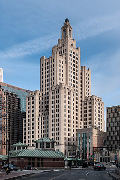

In [4]:
image

In [5]:
image = transforms.ToTensor()(image)
image = image.view(1, image.size(0), image.size(1), image.size(2))

# Convolution layer and Pooling layer
https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d

In [6]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5) # Unlike with linear layers, image size is not important! It just needs to be larger than kernel size

In [7]:
conv_layer.weight.size() # 16 filters, operating on 5x5 patches of 3 channels (RGB)

torch.Size([16, 3, 5, 5])

### Input to a convolutional layer has shape (BATCH_SIZE, N_CHANNELS, HEIGHT, WIDTH)
### E.g. First layer: (16, 3, 32, 32) - 16 RGB images 32x32 pixels

In [8]:
image.size()

torch.Size([1, 3, 180, 120])

In [9]:
output = conv_layer(image)

In [10]:
output.size() # Feature map - 16 channels, reduced size because no convolution on image edges (180x120 => 176x116)

torch.Size([1, 16, 176, 116])

In [11]:
# We can stack another layer
conv_layer_2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3)

In [12]:
output_2 = conv_layer_2(output)

In [13]:
output_2.shape # 32 channels

torch.Size([1, 32, 174, 114])

In [14]:
# We can reduce feature map size with a MaxPool layer
pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)

In [15]:
output_pool = pooling_layer(output_2)

In [16]:
output_pool.size() # the feature map spatial size is halved

torch.Size([1, 32, 87, 57])

In [17]:
# We can add padding to the image before convolution to keep the feature map size the same
conv_layer_3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)

In [19]:
output_3 = conv_layer_3(output_pool)

In [20]:
output_3.size()

torch.Size([1, 32, 87, 57])

# Example: fixed filters set manually

In [23]:
conv_layer = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3)

In [24]:
conv_layer.weight.size() # 4 filters, 3x3 on 3 channel images

torch.Size([4, 3, 3, 3])

In [25]:
#e.g. first filter: 3x3x3 matrix
conv_layer.weight[0]

tensor([[[ 0.0175, -0.1103,  0.0548],
         [ 0.0837, -0.0267, -0.0919],
         [ 0.0011,  0.1257,  0.1274]],

        [[ 0.0966, -0.1828,  0.0537],
         [-0.1550,  0.1212, -0.1872],
         [ 0.0579, -0.0306,  0.1919]],

        [[-0.1591, -0.0575, -0.0716],
         [ 0.1771,  0.1326,  0.1397],
         [-0.0503, -0.0933, -0.1877]]], grad_fn=<SelectBackward>)

In [26]:
# identity filter
filter1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

# smoothing filter - mean of surrounding pixels
filter2 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])

# edge detection filter - 0 for flat areas
filter3 = np.array([[-1, -1, -1],
                    [-1,  8,  1],
                    [-1, -1, -1]])

In [27]:
conv_layer.weight[0] = torch.tensor(filter1)
conv_layer.weight[1] = torch.tensor(filter2)
conv_layer.weight[2] = torch.tensor(filter3)

In [28]:
conv_layer.weight

Parameter containing:
tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

         [[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00]]],


        [[[ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01]],

         [[ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01]],

         [[ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01],
          [ 1.1111e-01,  1.1111e-01,  1.1111e-01]]],


        [[[-1.0000e+00, -1.0000e+00, -1.0000

In [29]:
out = conv_layer(image)

In [30]:
out.size()

torch.Size([1, 4, 178, 118])

In [31]:
out = out.detach().cpu().numpy()[0]

In [32]:
out.shape # 4 feature maps (image after convolution)

(4, 178, 118)

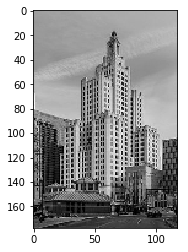

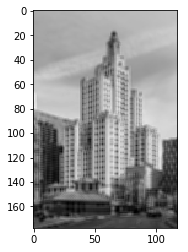

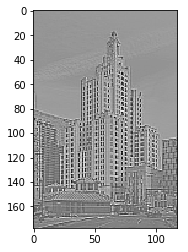

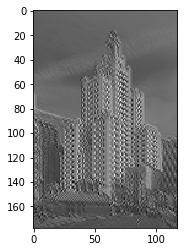

In [33]:
for i in range(len(out)):
    plt.figure()
    plt.imshow(out[i], cmap='gray')